<a href="https://colab.research.google.com/github/dmi3eva/araneae/blob/main/p1_spider_analysis/01_NL_length.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
%cd /content
%cd drive
%cd My\ Drive
%cd PhD
%cd Paper_01

/content
/content/drive
/content/drive/My Drive
/content/drive/My Drive/PhD
/content/drive/My Drive/PhD/Paper_01


In [26]:
%cd datasets
%cd araneae

/content/drive/My Drive/PhD/Paper_01/datasets
/content/drive/My Drive/PhD/Paper_01/datasets/araneae


### Loading

In [27]:
import json

In [28]:
with open('araneae_basic.json') as json_file:
  araneae_basic = json.load(json_file)

In [29]:
len(araneae_basic)

9693

In [30]:
araneae_basic[0]

{'db_id': 'concert_singer',
 'query': 'SELECT count(*) FROM singer',
 'query_toks': ['SELECT', 'count', '(', '*', ')', 'FROM', 'singer'],
 'query_toks_no_value': ['select', 'count', '(', '*', ')', 'from', 'singer'],
 'question': 'How many singers do we have?',
 'question_toks': ['How', 'many', 'singers', 'do', 'we', 'have', '?'],
 'source': 'spider-dev',
 'sql': {'except': None,
  'from': {'conds': [], 'table_units': [['table_unit', 1]]},
  'groupBy': [],
  'having': [],
  'intersect': None,
  'limit': None,
  'orderBy': [],
  'select': [False, [[3, [0, [0, 0, False], None]]]],
  'union': None,
  'where': []}}

### Analysis

In [31]:
import collections
import matplotlib.pyplot as plt

In [33]:
%matplotlib inline 

In [32]:
all_length = [len(_sample['question_toks']) for _sample in araneae_basic]

In [34]:
length_frequency = collections.Counter(all_length)

In [35]:
length_frequency

Counter({1: 1,
         2: 5,
         3: 27,
         4: 62,
         5: 130,
         6: 386,
         7: 425,
         8: 561,
         9: 682,
         10: 687,
         11: 725,
         12: 853,
         13: 798,
         14: 723,
         15: 709,
         16: 632,
         17: 499,
         18: 441,
         19: 367,
         20: 277,
         21: 191,
         22: 153,
         23: 86,
         24: 71,
         25: 61,
         26: 41,
         27: 42,
         28: 11,
         29: 10,
         30: 12,
         31: 4,
         32: 3,
         33: 4,
         34: 2,
         35: 3,
         36: 1,
         37: 1,
         39: 2,
         40: 1,
         41: 1,
         42: 1,
         43: 1,
         44: 1})

<BarContainer object of 43 artists>

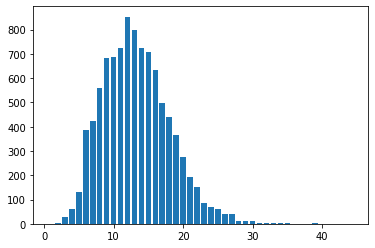

In [36]:
plt.bar(length_frequency.keys(), length_frequency.values())

In [37]:
bin_size = len(araneae_basic) // 3

Defining length of short requests

In [38]:
short_bin = 0

for _len, _short_amount in length_frequency.items():
  short_bin += _short_amount  
  if short_bin >= bin_size:
    short_length = _len
    break 

short_length

13


In [39]:
avg_bin = 0

for _len, _avg_amount in length_frequency.items():
  if _len <= short_length:
    continue
  avg_bin += _avg_amount  
  if avg_bin >= bin_size:
    avg_length = _len
    break 

avg_length

17

### Length rules:
$$Short NL \leq 13$$
$$14 \leq AvgNL \leq 17$$
$$18 \leq LongNl$$



### Detecting of length type

In [41]:
from copy import deepcopy

In [46]:
araneae_with_NL = []
for _sample in araneae_basic:
  nl_sample = deepcopy(_sample)
  tag = None
  if len(nl_sample['question_toks']) <= 13:
    tag = "NL-short"
  elif len(nl_sample['question_toks']) <= 17:
    tag = "NL-avg"
  else:
    tag = "NL-long"
  nl_sample['tags'] = nl_sample.get('tags', []) + [tag]
  nl_sample.setdefault('description', {})['NL-length'] = tag
  araneae_with_NL.append(nl_sample)

In [47]:
araneae_with_NL[0]

{'db_id': 'concert_singer',
 'description': {'NL-length': 'NL-short'},
 'query': 'SELECT count(*) FROM singer',
 'query_toks': ['SELECT', 'count', '(', '*', ')', 'FROM', 'singer'],
 'query_toks_no_value': ['select', 'count', '(', '*', ')', 'from', 'singer'],
 'question': 'How many singers do we have?',
 'question_toks': ['How', 'many', 'singers', 'do', 'we', 'have', '?'],
 'source': 'spider-dev',
 'sql': {'except': None,
  'from': {'conds': [], 'table_units': [['table_unit', 1]]},
  'groupBy': [],
  'having': [],
  'intersect': None,
  'limit': None,
  'orderBy': [],
  'select': [False, [[3, [0, [0, 0, False], None]]]],
  'union': None,
  'where': []},
 'tags': ['NL-short']}

### Saving

In [48]:
with open('araneae.json', 'w') as json_file:
    json.dump(araneae_with_NL, json_file)